In [23]:

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\Nida\dads5001\public_150k_plus_230101.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

In [4]:
# ใน column มี ชื่อเหมือนกัน เช่น NEW YORK , NEW YORK
df['BorrowerCity'].str.upper()

0                   SUMTER
1         NORTH CHARLESTON
2                  SEATTLE
3           SAN BERNARDINO
4                      NaN
                ...       
968526              CASPER
968527         GREEN RIVER
968528               ROZET
968529            SHERIDAN
968530       TETON VILLAGE
Name: BorrowerCity, Length: 968531, dtype: object

In [5]:
# change datatype of date to datetime 
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# check the format column
df.head(10)['DateApproved']

0   2020-05-01
1   2020-05-01
2   2020-05-01
3   2020-05-01
4   2020-05-01
5   2020-05-01
6   2020-05-01
7   2020-05-01
8   2020-05-01
9   2020-05-01
Name: DateApproved, dtype: datetime64[ns]

In [6]:
#find NaN in data
df.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [7]:
# drop column have NaN more than 80%
df = df.drop(['FranchiseName','NonProfit','UTILITIES_PROCEED','MORTGAGE_INTEREST_PROCEED','RENT_PROCEED','REFINANCE_EIDL_PROCEED','HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED','NonProfit',],axis=1)

In [8]:
df.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       4
BorrowerAddress                   14
BorrowerCity                      12
BorrowerState                     13
BorrowerZip                       13
LoanStatusDate                 37667
LoanStatus                         0
Term                               0
SBAGuarantyPercentage              0
InitialApprovalAmount              0
CurrentApprovalAmount              0
UndisbursedAmount                 47
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             1
ProjectCity                       13
P

In [9]:
df = df.dropna()

In [10]:
df.head(10)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,PAYROLL_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,ForgivenessAmount,ForgivenessDate
13,5502308207,2020-08-08,1084,PPP,"KAKIVIK ASSET MANAGEMENT, LLC",5015 BUSINESS PARK BLVD,ANCHORAGE,AK,99503-7146,07/22/2021,...,9538531.00,Limited Liability Company(LLC),116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,9615884.57,06/11/2021
14,6110847106,2020-04-14,1084,PPP,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723,08/21/2021,...,7666768.00,Non-Profit Organization,89628,"National Cooperative Bank, National Association",HILLSBORO,OH,Unanswered,Unanswered,7761324.81,07/13/2021
16,5120868804,2021-04-17,1084,PPP,HOPE COMMUNITY RESOURCES INC.,540 W Intl Airport Rd,Anchorage,AK,99518-1105,10/06/2022,...,7223025.00,501(c)3 – Non Profit,3386,First National Bank Alaska,ANCHORAGE,AK,Unanswered,Unanswered,7321970.55,09/13/2022
17,6650277102,2020-04-14,1084,PPP,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603,06/09/2021,...,5037890.65,Corporation,3386,First National Bank Alaska,ANCHORAGE,AK,Unanswered,Unanswered,6598389.38,05/18/2021
20,3323817108,2020-04-11,1084,PPP,"COPPER RIVER SEAFOODS, INC.",1118 5TH AVE,ANCHORAGE,AK,99501-2759,08/13/2021,...,6382400.00,Corporation,119918,East West Bank,PASADENA,CA,Male Owned,Non-Veteran,6461470.84,07/07/2021
21,1570017908,2020-06-10,1084,PPP,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645-6732,07/14/2021,...,5928882.00,Cooperative,194499,CoBank ACB,Greenwood Village,CO,Unanswered,Unanswered,5987841.44,06/10/2021
22,3569947101,2020-04-11,1084,PPP,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503-2618,08/20/2021,...,5682490.00,Corporation,56102,KeyBank National Association,CLEVELAND,OH,Unanswered,Unanswered,5751925.36,07/22/2021
24,6197677007,2020-04-06,1084,PPP,"NORTHERN ENERGY SERVICES, LLC",6250 South Airpark Place,ANCHORAGE,AK,99502-1865,08/20/2021,...,5095098.00,Limited Liability Company(LLC),116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,5161124.89,07/28/2021
25,2256077301,2020-04-29,1084,PPP,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",Anchorage,AK,99515,11/23/2021,...,5036100.00,Limited Liability Company(LLC),225134,Truist Bank,CHARLOTTE,NC,Unanswered,Unanswered,5091636.99,06/11/2021
26,8062947105,2020-04-15,1084,PPP,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645,07/08/2021,...,4285941.88,Subchapter S Corporation,3386,First National Bank Alaska,ANCHORAGE,AK,Unanswered,Unanswered,5075790.57,06/11/2021


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916738 entries, 13 to 968530
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   LoanNumber                   916738 non-null  int64         
 1   DateApproved                 916738 non-null  datetime64[ns]
 2   SBAOfficeCode                916738 non-null  int64         
 3   ProcessingMethod             916738 non-null  object        
 4   BorrowerName                 916738 non-null  object        
 5   BorrowerAddress              916738 non-null  object        
 6   BorrowerCity                 916738 non-null  object        
 7   BorrowerState                916738 non-null  object        
 8   BorrowerZip                  916738 non-null  object        
 9   LoanStatusDate               916738 non-null  object        
 10  LoanStatus                   916738 non-null  object        
 11  Term                     

In [18]:
df.isna().sum()

LoanNumber                     0
DateApproved                   0
SBAOfficeCode                  0
ProcessingMethod               0
BorrowerName                   0
BorrowerAddress                0
BorrowerCity                   0
BorrowerState                  0
BorrowerZip                    0
LoanStatusDate                 0
LoanStatus                     0
Term                           0
SBAGuarantyPercentage          0
InitialApprovalAmount          0
CurrentApprovalAmount          0
UndisbursedAmount              0
ServicingLenderLocationID      0
ServicingLenderName            0
ServicingLenderAddress         0
ServicingLenderCity            0
ServicingLenderState           0
ServicingLenderZip             0
RuralUrbanIndicator            0
HubzoneIndicator               0
LMIIndicator                   0
BusinessAgeDescription         0
ProjectCity                    0
ProjectCountyName              0
ProjectState                   0
ProjectZip                     0
CD        

In [12]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"916,738.00","916,738.00"
mean,"530,606.79","528,933.92"
std,"734,838.50","728,620.50"
min,0.00,"150,000.00"
25%,"200,644.19","200,800.00"
50%,"296,041.00","295,843.18"
75%,"541,696.50","540,522.00"
max,"10,000,000.00","10,000,000.00"


In [17]:
#change scientific notation to decimal 2 number
pd.options.display.float_format = "{:,.2f}".format
aggegate_ini = df['InitialApprovalAmount'].agg(['mean','count','max','min'])
aggegate_cur = df['CurrentApprovalAmount'].agg(['mean','count','max','min'])

print(aggegate_ini)

print("\n--------------------------------------------\n")

print(aggegate_cur)

mean       530,606.79
count      916,738.00
max     10,000,000.00
min              0.00
Name: InitialApprovalAmount, dtype: float64

--------------------------------------------

mean       528,933.92
count      916,738.00
max     10,000,000.00
min        150,000.00
Name: CurrentApprovalAmount, dtype: float64


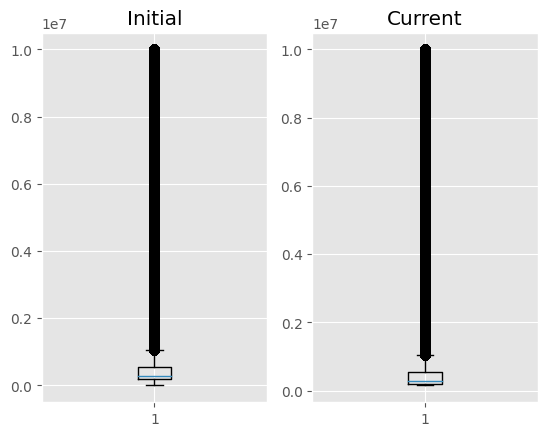

In [14]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

In [15]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df_ini = filter_outliner(df,'InitialApprovalAmount')
df_cur = filter_outliner(df,'CurrentApprovalAmount')

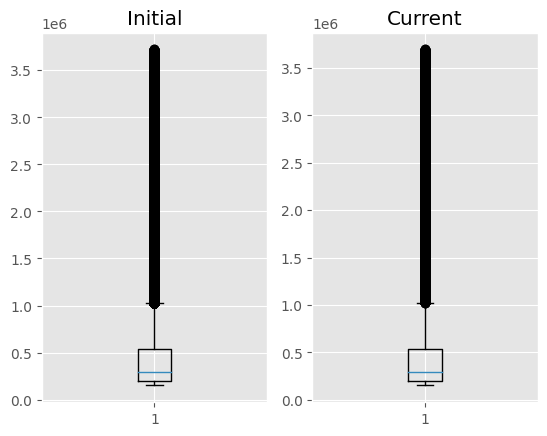

In [28]:
#boxplox looking for remove outliner
plt.subplot(1,2,1)
plt.boxplot(df_ini['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df_cur['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

In [35]:
q1 = df.groupby("BorrowerState")['InitialApprovalAmount','CurrentApprovalAmount'].apply(lambda x : x.mean())

q1
    

,InitialApprovalAmount,CurrentApprovalAmount
BorrowerState,,
AK,"475,568.03","481,197.04"
AL,"510,090.21","509,467.72"
AR,"475,328.09","475,467.95"
AS,"235,023.14","235,023.14"
AZ,"513,174.90","511,606.25"
CA,"532,920.46","529,881.06"
CO,"500,945.53","501,248.50"
CT,"517,817.29","516,711.17"
DC,"569,088.81","565,978.22"
